# **Student Performance Dataset**

In [2]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data
df = pd.read_csv("data/student_data.csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## Data Preprocessing

In [4]:
# Normalize column names
df.columns = df.columns.str.lower()

In [5]:
# Descriptive summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   studentid          2392 non-null   int64  
 1   age                2392 non-null   int64  
 2   gender             2392 non-null   int64  
 3   ethnicity          2392 non-null   int64  
 4   parentaleducation  2392 non-null   int64  
 5   studytimeweekly    2392 non-null   float64
 6   absences           2392 non-null   int64  
 7   tutoring           2392 non-null   int64  
 8   parentalsupport    2392 non-null   int64  
 9   extracurricular    2392 non-null   int64  
 10  sports             2392 non-null   int64  
 11  music              2392 non-null   int64  
 12  volunteering       2392 non-null   int64  
 13  gpa                2392 non-null   float64
 14  gradeclass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [6]:
# Convert StudentID to string
df['studentid'] = df['studentid'].astype('object')

In [7]:
# Check duplicates
print(df.duplicated().sum())

print(df['studentid'].duplicated().sum())

0
0


In [8]:
# Inspect gradeclass column values
df['gradeclass'].value_counts()

4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: gradeclass, dtype: int64

Up to this point the dataset is cleaned, there are no missing values, no duplicates, data types are corrected, and column names are normalized.

## Exploratory Data Analysis

In [9]:
# Summary statistics
df.describe()

,age,gender,ethnicity,parentaleducation,studytimeweekly,absences,tutoring,parentalsupport,extracurricular,sports,music,volunteering,gpa,gradeclass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


### Univariate Analysis

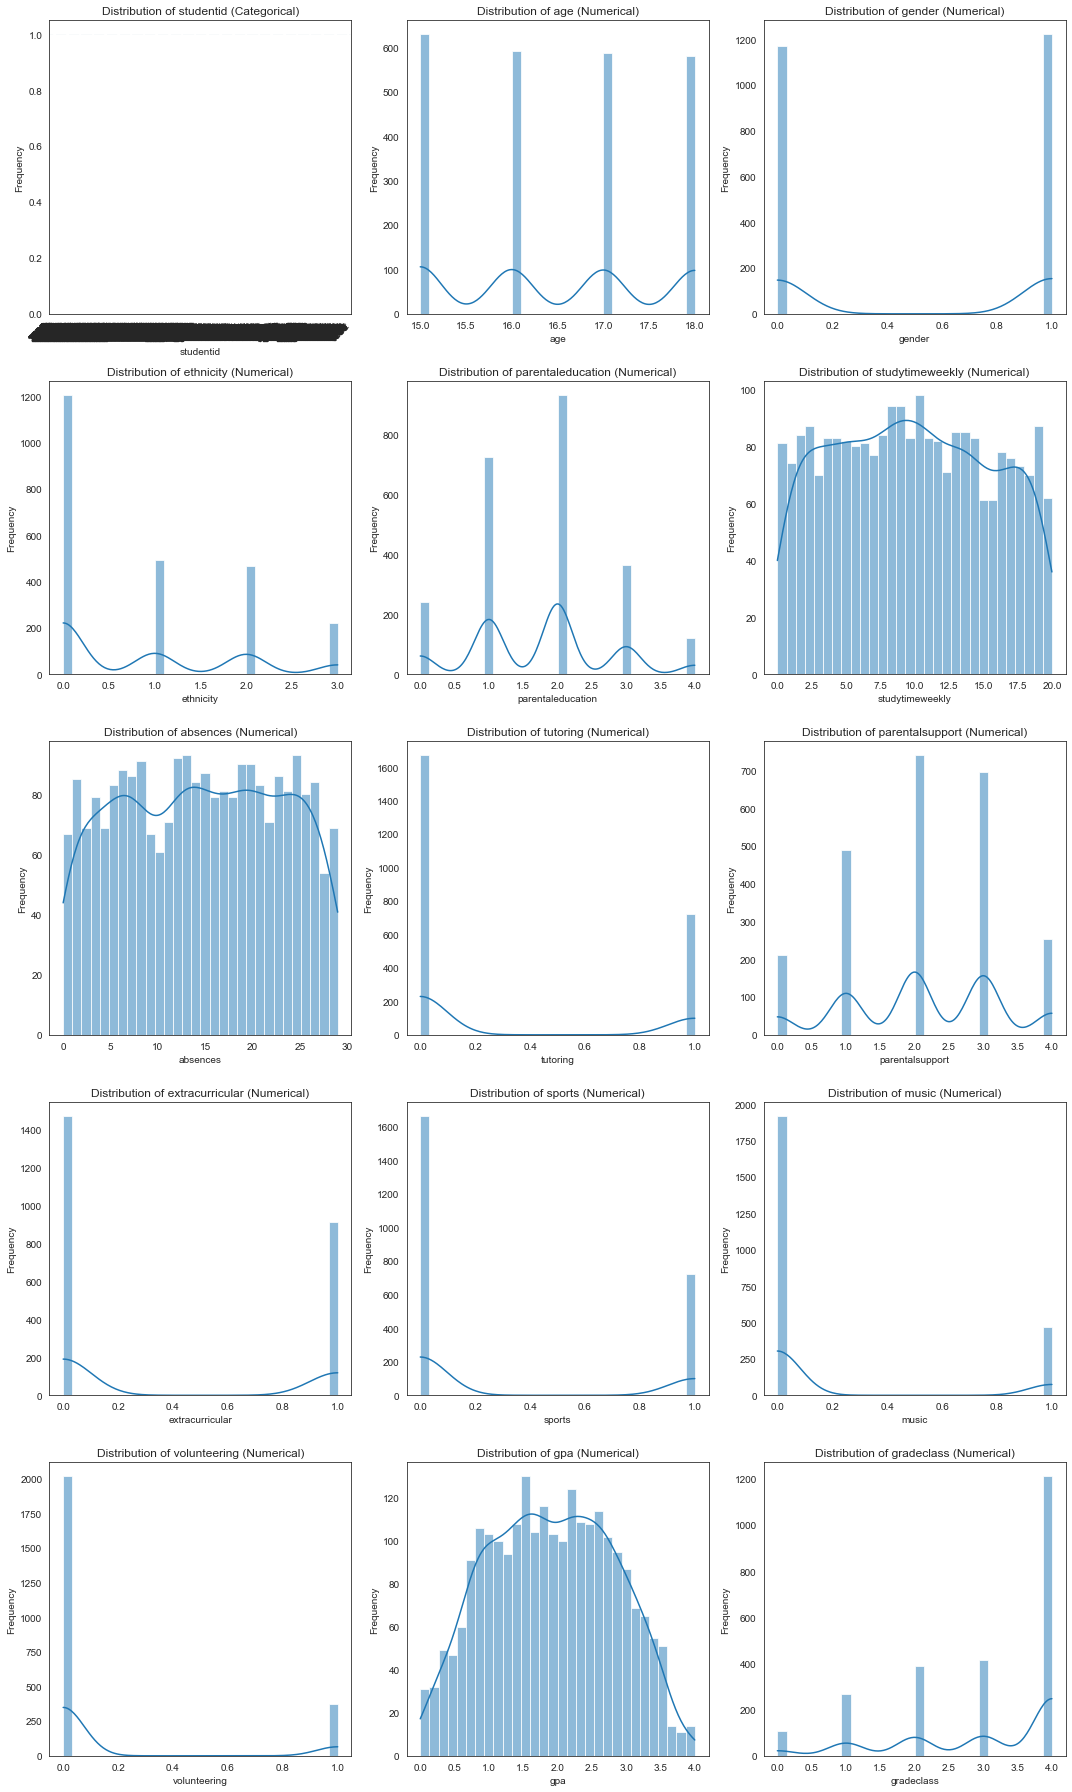

In [10]:
# Set the number of rows and columns for the grid
n_cols = 3  # Number of columns in the grid
columns = df.columns  # Dataset columns

n_rows = -(-len(columns) // n_cols)  # Calculate rows to fit all plots

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

# Plot each column
for i, column in enumerate(columns):
    ax = axes[i]
    if pd.api.types.is_numeric_dtype(df[column]):
        sns.histplot(df[column], kde=True, bins=30, ax=ax)
        ax.set_title(f'Distribution of {column} (Numerical)')
    elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':
        sns.countplot(x=df[column], order=df[column].value_counts().index, ax=ax)
        ax.set_title(f'Distribution of {column} (Categorical)')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Delete any unused axes

plt.tight_layout()
plt.show()

From the univariate analysis, the following can be observed:

- There are slighly more female students than male students
- Majority of the students aren't taking part in extracurricula activities compared to those that are actively involved, this also applies to sports, music, and volunteering.
- Mean GPA is 1.9 and the scores indicate a normal distribution.
- A staggering majority of the students fall within the 'F' GradeClass which is less than 2.0 gpa
- On average, each student spends roughly 10 hrs studying in a week.
- A student is estimated to miss school for a total on 2 weeks in a school calendar year on average.
- Majority of the students are getting moderate to high parental support
- It can be observed that majoriry of the students are not getting any tutoring when away from school
- Mean age for the students is 16.5 yrs
- A staggering majority of students are of Caucasian ethnicity, which is more than double African-American and Asian ethnicities while the minority group belongs to other ethnicities.
- In terms of Educational achievement, most of the parents attended some college, followd by High school certifications whereas the least number is observed in Higher education beyond Bachelors' certification

### Bivariate Analysis

gender
0    1.918679
1    1.894225
Name: gpa, dtype: float64


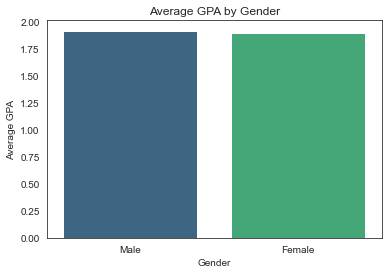

In [11]:
# # Performance by gender
print(df.groupby('gender')['gpa'].mean())
# Grouping by gender and calculating the mean GPA 
gpa_by_gender = df.groupby('gender')['gpa'].mean().reset_index() 
# Mapping gender to human-readable labels 
gpa_by_gender['gender'] = gpa_by_gender['gender'].map({0: 'Male', 1: 'Female'}) 
# Plotting a vertical bar graph with different colors 
sns.barplot(x='gender', y='gpa', data=gpa_by_gender, palette='viridis') 
plt.ylabel('Average GPA') 
plt.xlabel('Gender') 
plt.title('Average GPA by Gender') 
plt.show()

Male students have a slighly higher average GPA compared to their female counter-parts.

**Visualizing Participation by Gender**

   gender  extracurricular
0    Male              452
1  Female              465


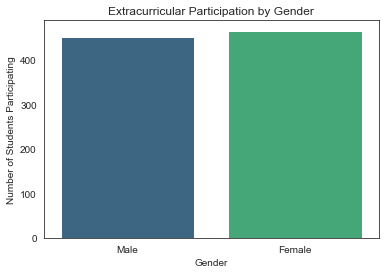

In [12]:
# Grouping by gender and calculating the count of extracurricular participation
extracurricular_by_gender = df.groupby('gender')['extracurricular'].sum().reset_index()

# Mapping gender to human-readable labels
extracurricular_by_gender['gender'] = extracurricular_by_gender['gender'].map({0: 'Male', 1: 'Female'})
print(extracurricular_by_gender)

# Bar plot for extracurricular participation by gender 
sns.barplot(x='gender', y='extracurricular', data=extracurricular_by_gender, palette='viridis') 
plt.ylabel('Number of Students Participating') 
plt.xlabel('Gender') 
plt.title('Extracurricular Participation by Gender') 
plt.show()

Slighly more female students are participatting in extracurricular activities than their male counterparts

   gender   absences
0    Male  14.355556
1  Female  14.719313


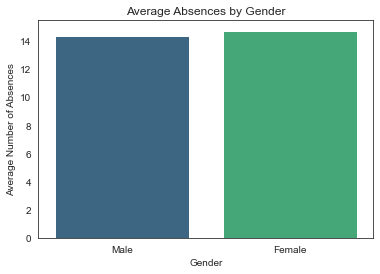

In [13]:
# Grouping by gender and calculating the mean absences
absences_by_gender = df.groupby('gender')['absences'].mean().reset_index()

# Mapping gender to human-readable labels
absences_by_gender['gender'] = absences_by_gender['gender'].map({0: 'Male', 1: 'Female'})
print(absences_by_gender)

# Bar plot for average absences by gender
sns.barplot(x='gender', y='absences', data=absences_by_gender, palette='viridis')
plt.ylabel('Average Number of Absences')
plt.xlabel('Gender')
plt.title('Average Absences by Gender')
plt.show()

In terms of absenteeism, female students happen to miss school more compared to male students on average, although the differences are quite small

#### Correlation Analysis

gradeclass           1.000000
absences             0.728633
parentaleducation    0.041031
gender               0.022998
volunteering         0.013156
age                 -0.006250
ethnicity           -0.023326
sports              -0.026654
music               -0.036065
extracurricular     -0.069733
tutoring            -0.111695
studytimeweekly     -0.134131
parentalsupport     -0.136823
gpa                 -0.782835
Name: gradeclass, dtype: float64


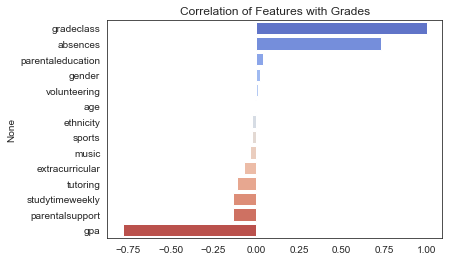

In [14]:
# Compute Pearson correlation
correlations = df.corr()

# Sort by target variable (e.g., 'grades')
target_corr = correlations['gradeclass'].sort_values(ascending=False)

# Display correlations
print(target_corr)

# Visualize the top correlated features
sns.barplot(x=target_corr.values, y=target_corr.index, palette='coolwarm')
plt.title('Correlation of Features with Grades')
plt.show()

### Multivariate Analysis

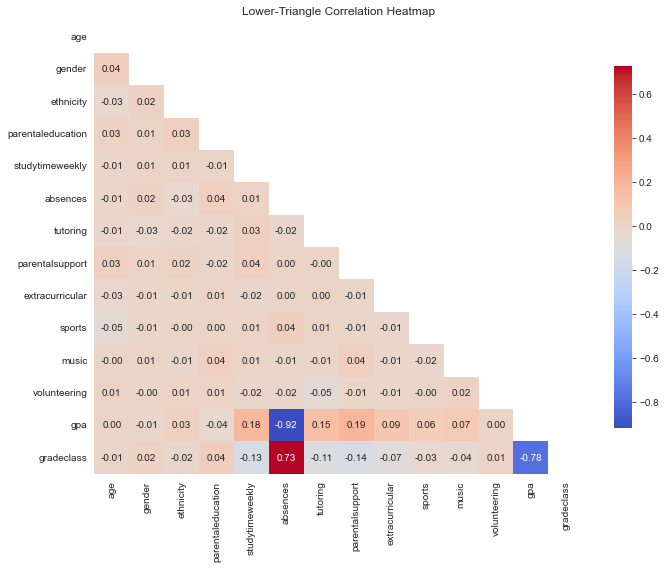

In [15]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, 
            mask=mask,  # Apply the mask
            annot=True,  # Display correlation values
            cmap='coolwarm',  # Choose a color palette
            fmt='.2f',  # Format for the correlation values
            square=False,  # Make the heatmap square-shaped
            cbar_kws={'shrink': 0.8})  # Adjust color bar size
plt.title('Lower-Triangle Correlation Heatmap')
plt.tight_layout()
plt.show()

### Pair Plots
Pair plots are an excellent way to visualize relationships between numerical features and your target variable. However, pair plots are more suited for continuous target variables. Since your target variable (GradeClass) is categorical, you can use pair plots to see how the numerical features relate to each class in the target variable, with hue representing the classes.

In [18]:
# Select(subsetting) numerical features and the target variable
features = ['age', 'studytimeweekly', 'absences', 'gpa']
data_subset = df[features + ['gradeclass']]

In [19]:
#Convert target variable for visualization
data_subset['gradeclass'] = data_subset['gradeclass'].astype('category')

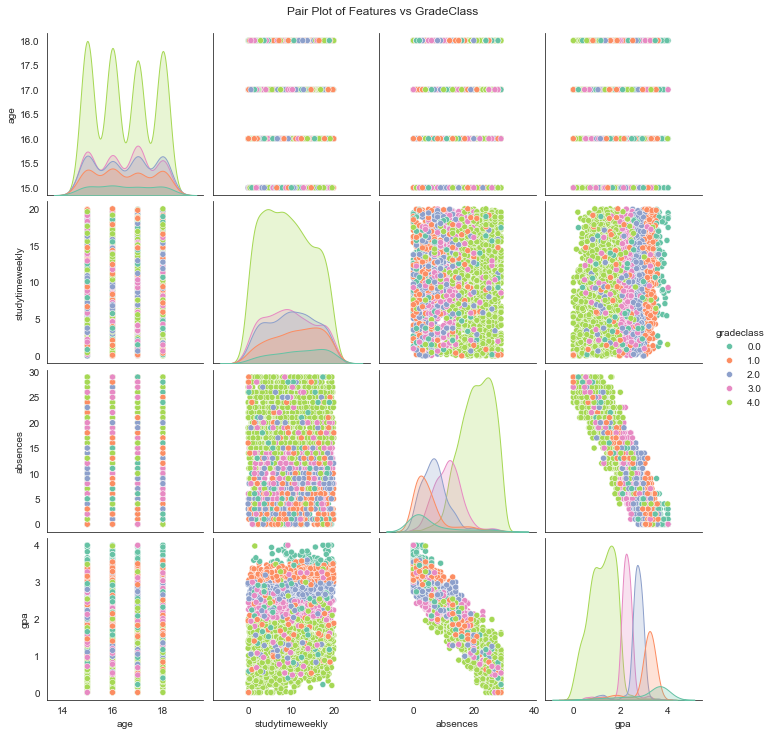

In [20]:
# Plot the Pair Plot
sns.pairplot(data_subset, hue='gradeclass', palette='Set2', diag_kind='kde')
plt.suptitle("Pair Plot of Features vs GradeClass", y=1.02)  # Add a title
plt.show()

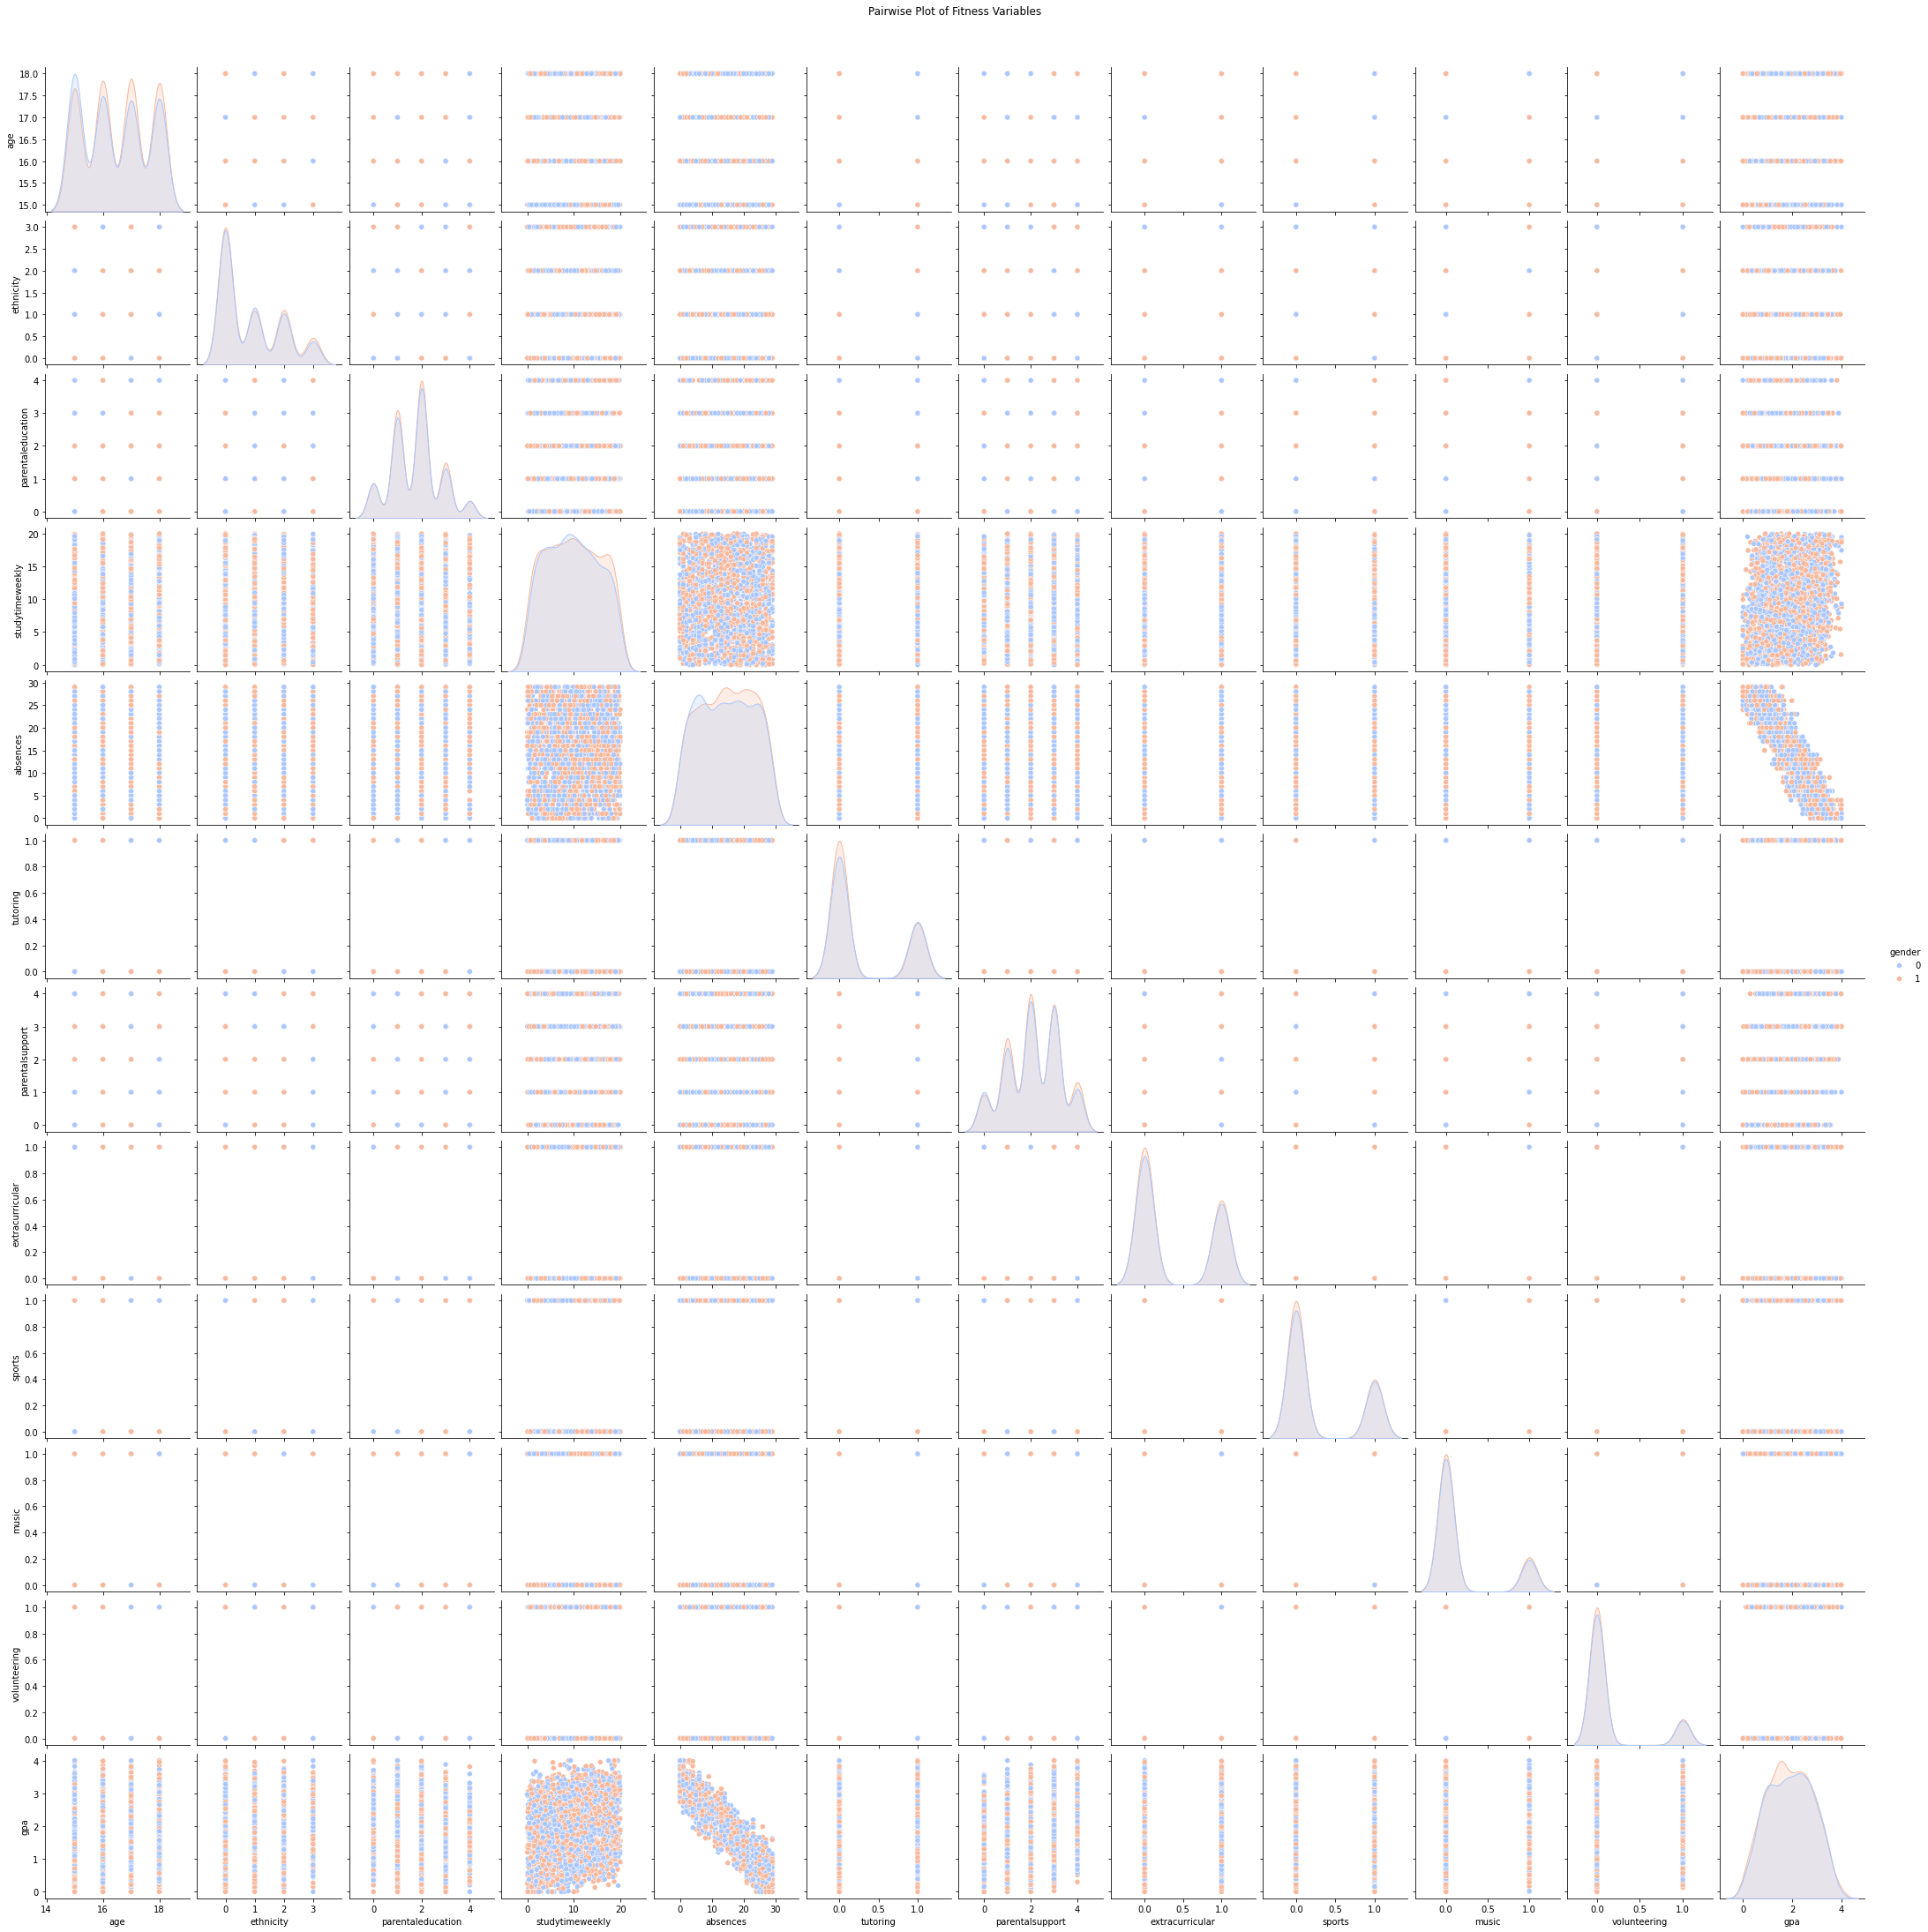

In [12]:
# # Select relevant columns
# pairplot_columns = ['age', 'gender', 'ethnicity', 'parentaleducation',
#        'studytimeweekly', 'absences', 'tutoring', 'parentalsupport',
#        'extracurricular', 'sports', 'music', 'volunteering', 'gpa']

# # Pairplot with hue (categorical differentiation)
# sns.pairplot(data[pairplot_columns], hue='gender', diag_kind='kde', palette='coolwarm')
# plt.suptitle('Pairwise Plot of Fitness Variables', y=1.02)
# plt.show()